# Multiple linear regression model for the prediction of demand for shared bikes.

### 1. Importing the libraries necessary for analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

### 2. Reading and understanding the data

In [3]:
bikes = pd.read_csv('day.csv') # Read the data from the csv file

print('Data \n',bikes.head())
print('Info \n',bikes.info())

# Quick check on the data

Data 
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core

In [4]:
bikes.describe() # Checking the statistical parameters of the numerical columns

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bikes.head() # Header check on the data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Comments : <br>

1. **dteday** variable is not needed as we already have the month in **mnth** and year in **yr**. We can drop this.
2. **casual** and **registered** are 2 variables which sum up to the target variable **cnt** hance we can drop these.
3. **instant** is just numbering of the rows and will add no value to analysis. Hence can be dropped.


### 2.1. Removing redundant columns at first glance

In [6]:
bikes.drop(columns=['dteday','registered','casual','instant'], inplace=True) # Removing the unnecessary columns
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 2.2. Dealing with categorical variables : (These are Unordered categorical variables) <br>

        ['weekday', 'month', 'year', 'holiday', 'workingday', 'weathersit', 'season']

        Analysing the categorical columns : 

        Step 1: Map the variables as per the data dictionary : 

            This is for further clearer dummy variable treatment

In [7]:
# Mapping the data as per the data dictionaly for further clearer dummy variable treatment

bikes['weathersit'] = bikes['weathersit'].map({1:'Clear / Few clouds',
                                               2:'Mist + Cloudy',
                                               3: 'Light Snow / Light Rain',
                                               4: 'Heavy Rain / Ice Pallets'}) # Getting the weather condition names

bikes['season'] = bikes['season'].map({1: 'spring', 2: 'summer', 3:'fall', 4:'winter'}) # Getting the season names

bikes['weekday'] = bikes['weekday'].map({0:'Sun', 
                                         1:'Mon', 
                                         2:'Tue', 
                                         3:'Wed', 
                                         4:'Thu', 
                                         5:'Fri', 
                                         6:'Sat'}) # Getting the day names

bikes['mnth'] = bikes['mnth'].map({1: 'Jan',
                                     2: 'Feb',
                                     3: 'Mar',
                                     4: 'Apr',
                                     5: 'May',
                                     6: 'Jun',
                                     7: 'Jul',
                                     8: 'Aug',
                                     9: 'Sept',
                                     10: 'Oct',
                                     11: 'Nov',
                                     12: 'Dec'}) # Getting the month names

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear / Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear / Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear / Few clouds,9.305237,11.46350,43.6957,12.522300,1600


        Step 2: Make a box plot for each categorical variable

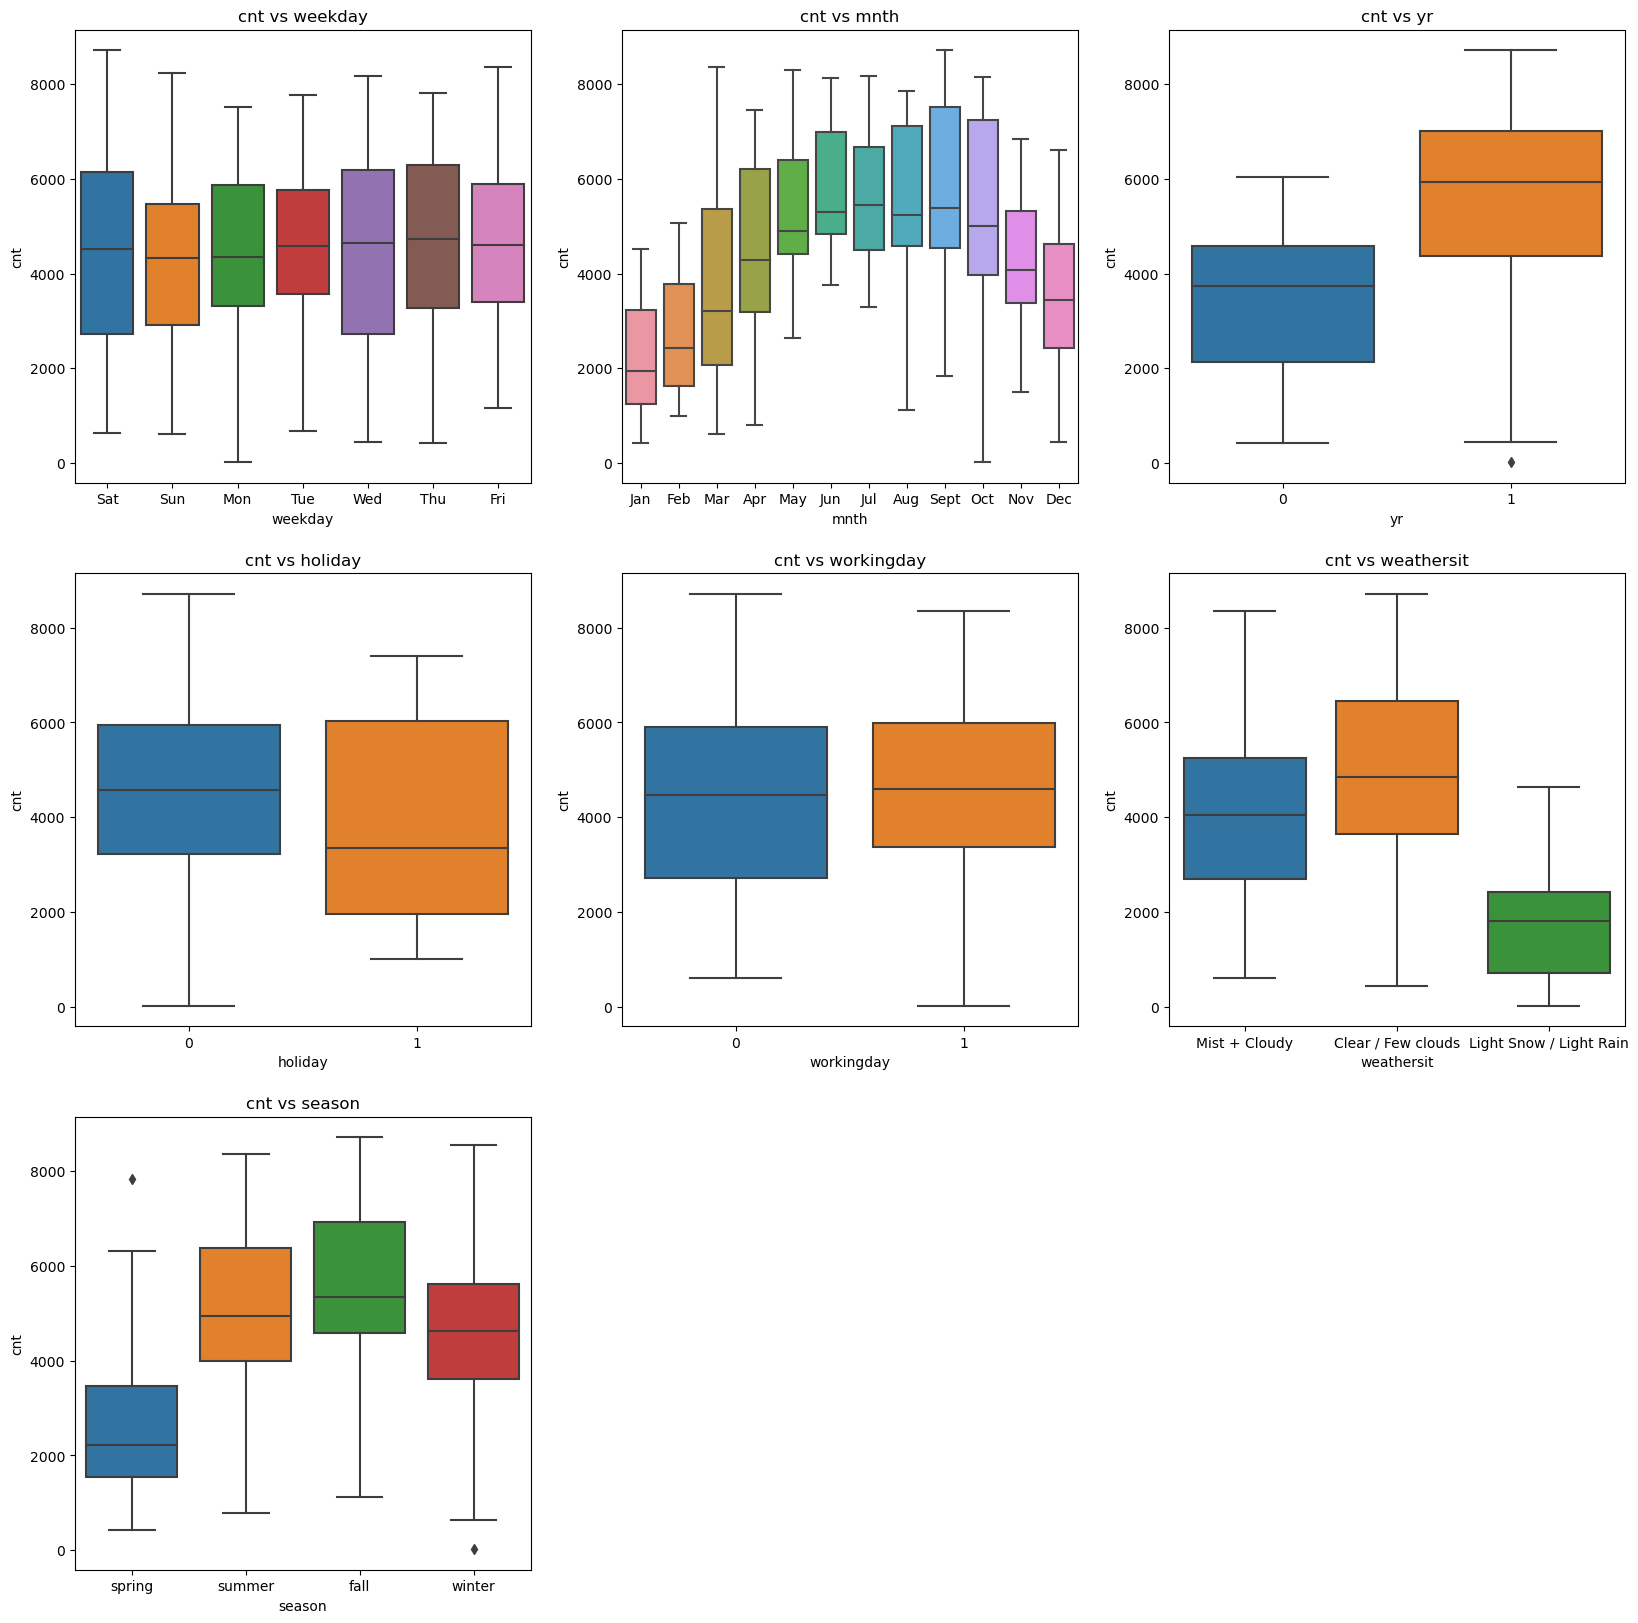

In [8]:
categorical_cols = pd.Series(['weekday', 'mnth', 'yr', 'holiday', 'workingday', 'weathersit', 'season']) 
# Identified the categorical columns

plt.figure(figsize=(20,20))

for column in categorical_cols: # Loop for each column to create a boxplot
    plt.subplot(3,3,(categorical_cols[categorical_cols == column].index[0] + 1)) 
    sns.boxplot(y='cnt', x=column, data=bikes)
    plt.title('cnt vs {}'.format(column))

plt.show()

####            Observations : 
1.          The mean across weekdays is almost the same. The upper limits are slightly higher on Fridays and Saturdays
2.          This is used most in the months of May to Sept.
3.          Least used in Spring. Used most during fall.
4.          Weather should be relatively clearer for it to be used. Snow or light rain can drastically affect the usage.
5.          Used more when it is not a holiday. Which would mean that it is used by office goers mostly.
6.          2019 shows higher usage trends. (We can try to get trends on the basis of years)

        Step 3: Make bar plots pairs for each categorical variable along with YoY comparison

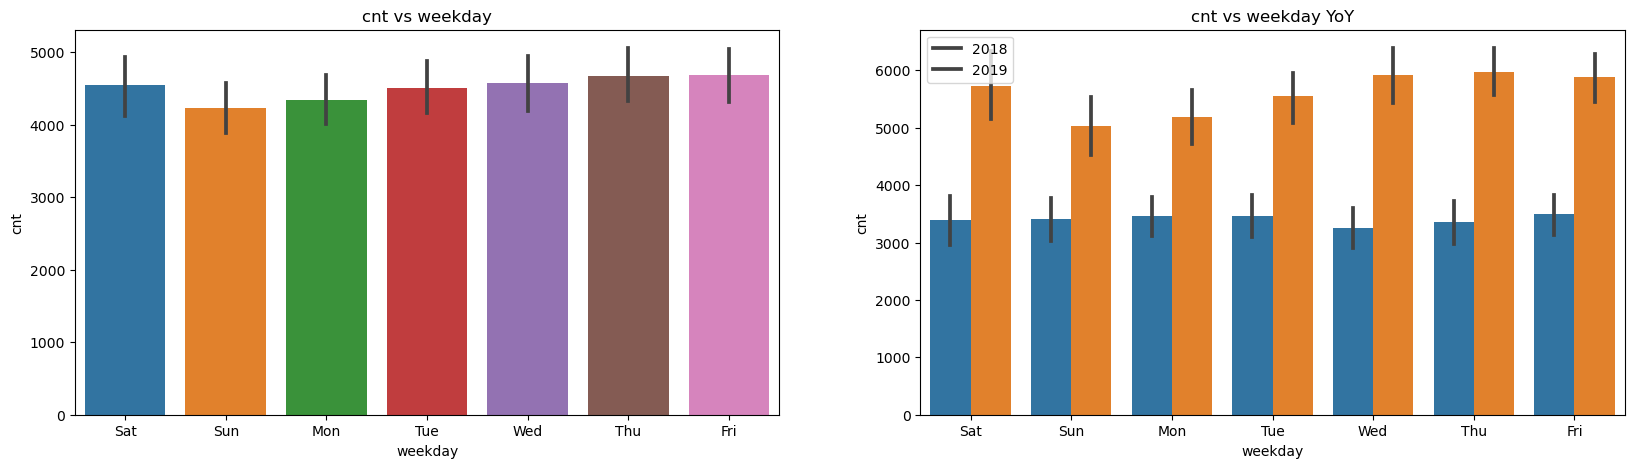

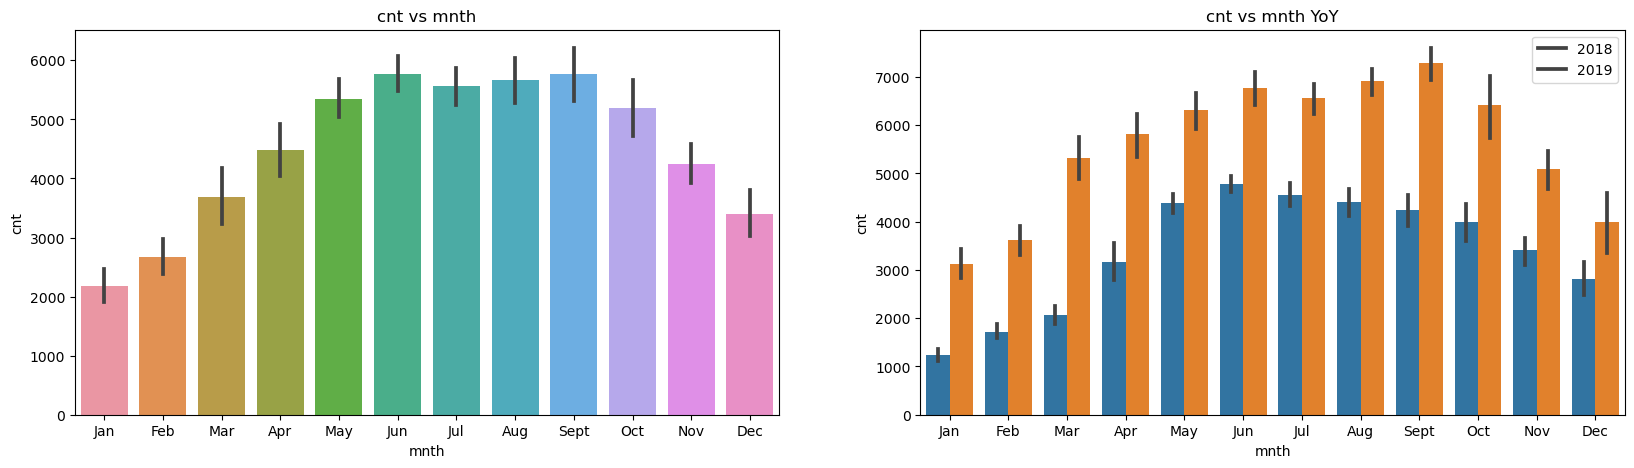

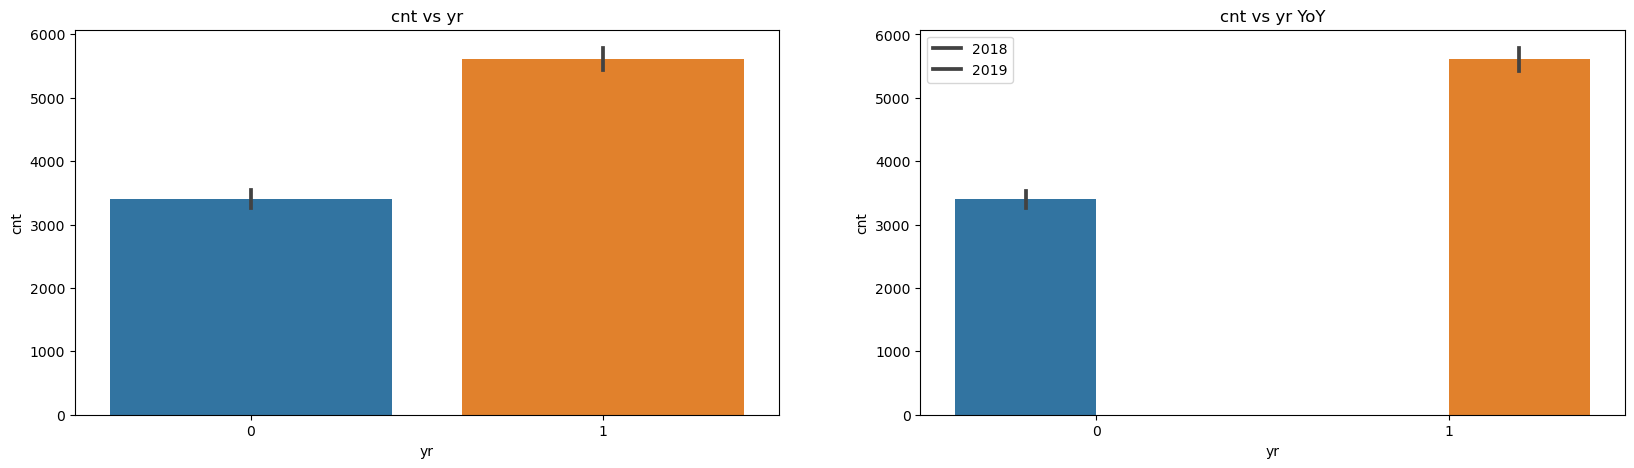

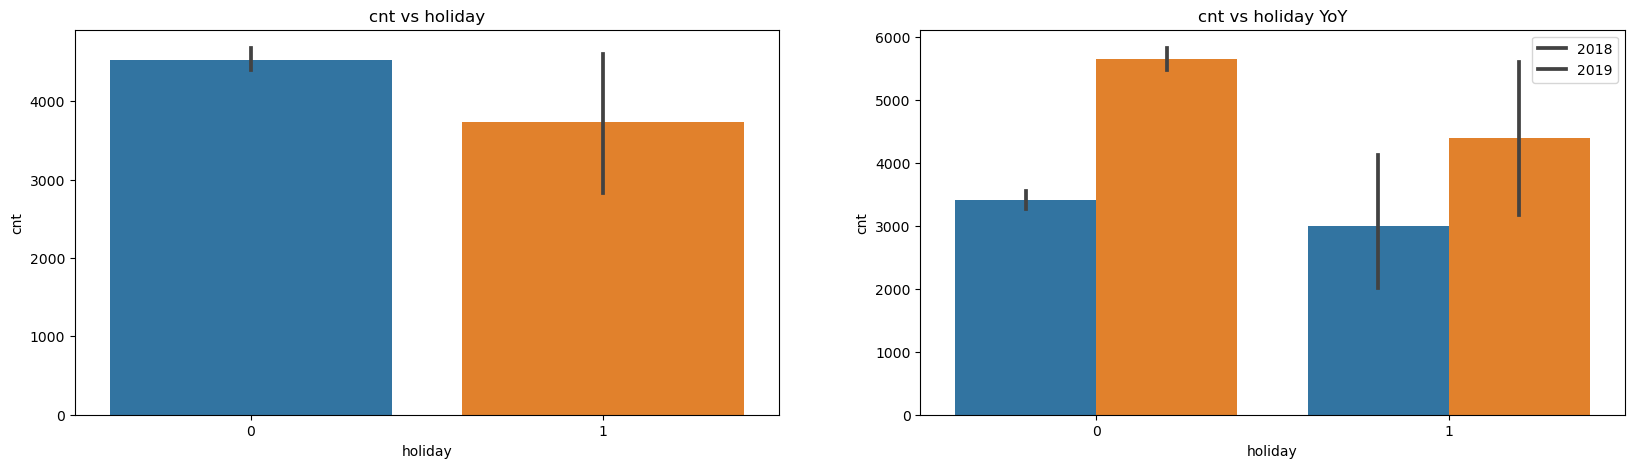

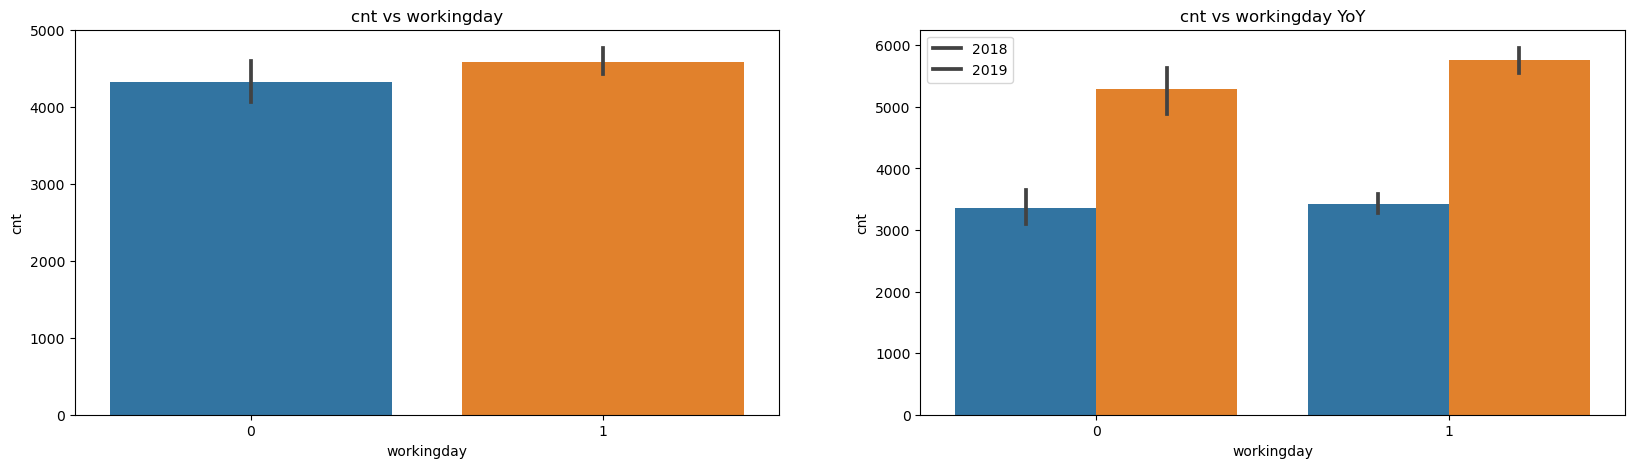

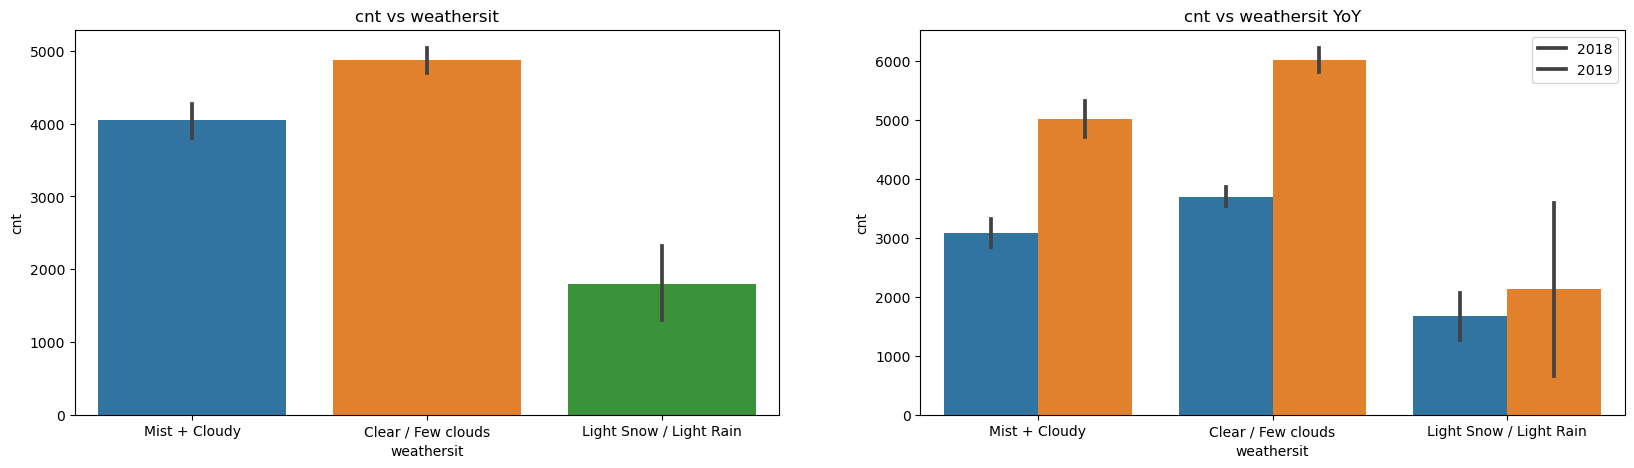

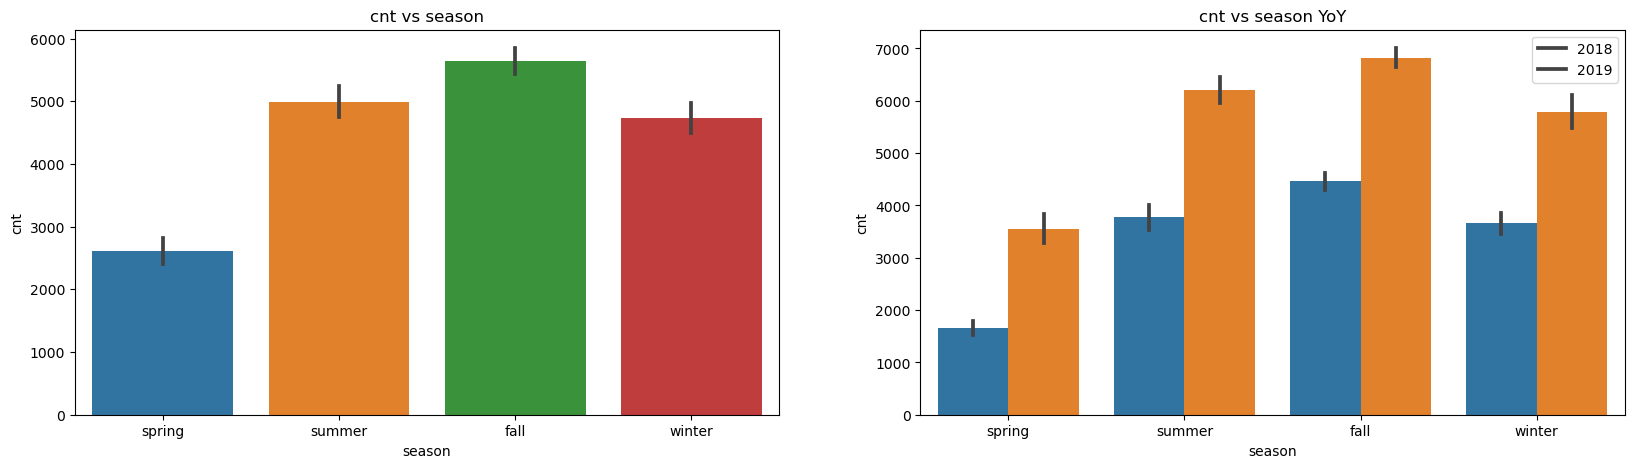

In [9]:
# Bar plot to understand the influence of categorical variables against the target variable on a year on year basis


for column in categorical_cols: # Loop in the categorical cols

    plt.figure(figsize=(20,5))

    plt.subplot(1,2,1)
    sns.barplot(y='cnt', x=column, data=bikes) # Normal bar plot
    plt.title('cnt vs {}'.format(column))
    
    plt.subplot(1,2,2)
    sns.barplot(y='cnt', x=column, data=bikes, hue='yr') # Get the year on year comparison
    plt.title('cnt vs {} YoY'.format(column))
    plt.legend(labels = ['2018','2019'])
    
    plt.show()


#### Observations:

1. The observations made from the box plot analysis are mostly validated
2. We see that the usage has proportionally increased in 2019 as compared to 2018. The trend across the variables is the same. Only the quantity has increased.

### 2.3. Analysing the numerical columns:

        Step 1: Identify the numerical columns

In [10]:
num_vars = bikes.select_dtypes(include=['number']).columns[bikes.select_dtypes(include=['number']).max() != 1]
#The logic here to identify the columns is to find the numerical columns where the max value isn't 1

        Step 2: Make a quick pairplot of the numerical variables

<Figure size 1500x1500 with 0 Axes>

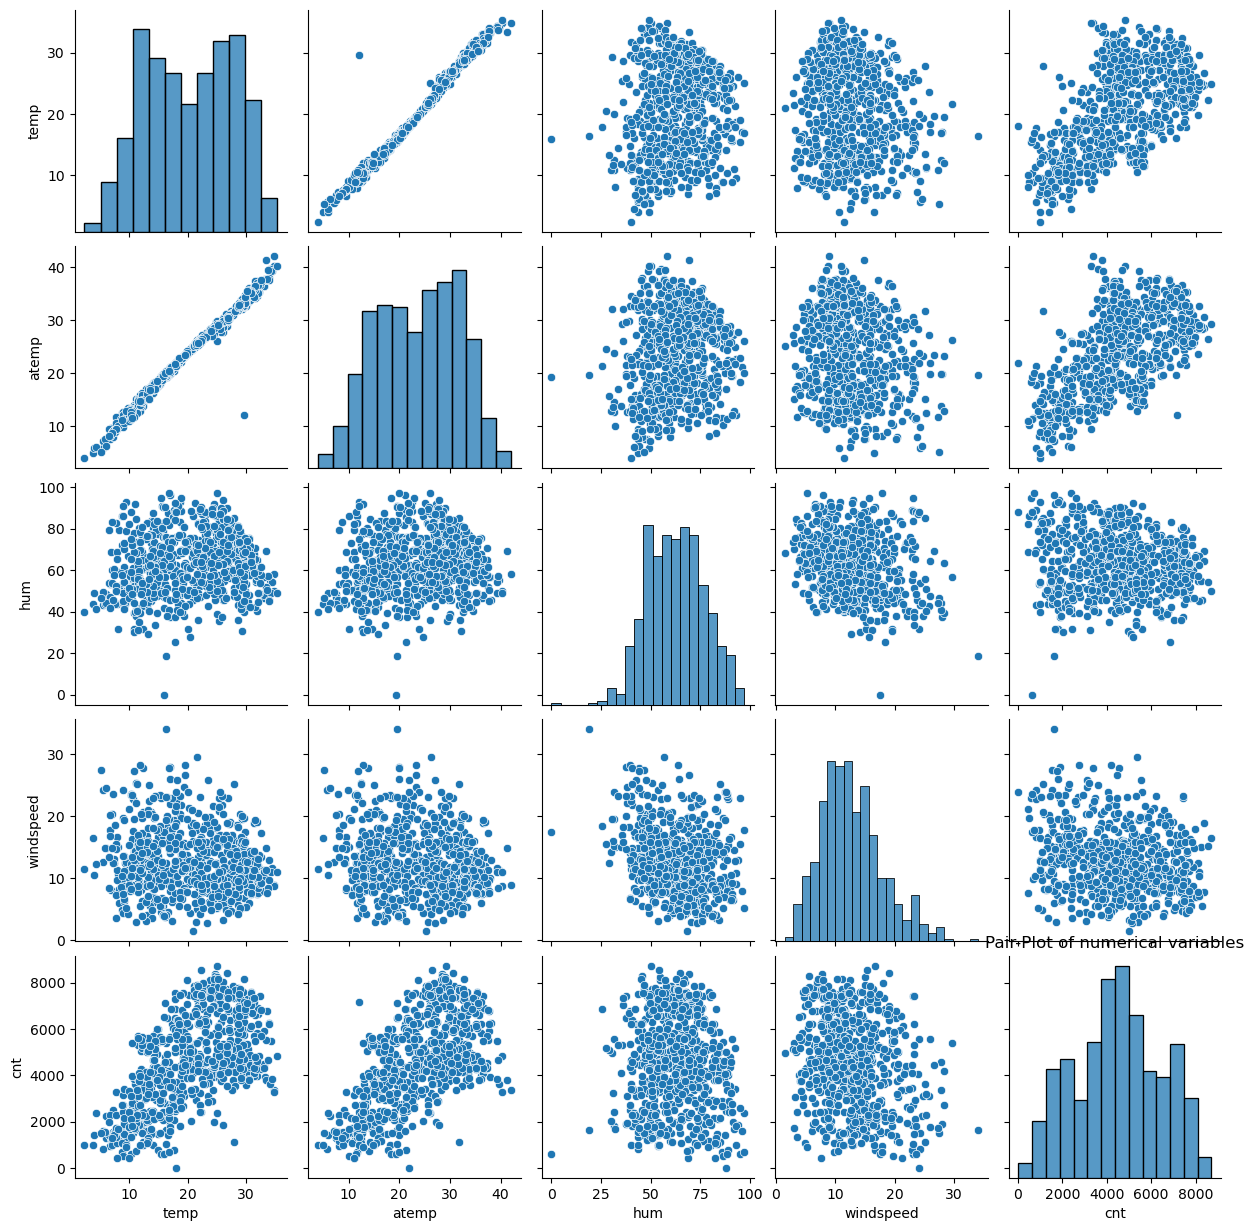

In [11]:
# Pair plot to show the relation amongst numerical variables

plt.figure(figsize=(15,15))
sns.pairplot(bikes[num_vars]) # Plot the pair plot to see the trends in the scatter plots amongst numerical variables
plt.title('Pair-Plot of numerical variables')
plt.show()

#### Observations:

1. **temp** and **atemp** have very high correlation with each other and a decent correlation with the target variable.
2. One of the m can be removed. Will check the p-values and VIF.

## 3. Preparing the data:

### 3.1. Creating Dummies for categorical variables

        Firstly a quick look at the data:

In [12]:
bikes.head() # Quick check on the data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear / Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear / Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear / Few clouds,9.305237,11.46350,43.6957,12.522300,1600


        Step 1. Creating dummies for the categorical variables

In [13]:
# Create dummies for the categorical variables. Drop the first column to avoid multi colliearity
weather_dummies = pd.get_dummies(bikes['weathersit'], drop_first=True)
month_dummies = pd.get_dummies(bikes['mnth'], drop_first=True)
weekday_dummies = pd.get_dummies(bikes['weekday'], drop_first=True)
season_dummies = pd.get_dummies(bikes['season'], drop_first=True)

bikes.drop(columns = ['weekday', 'mnth', 'weathersit', 'season'], inplace = True) # Drop the categorical variables

bikes = pd.concat([bikes,weather_dummies,month_dummies,weekday_dummies,season_dummies],axis=1) 
# COncatenate the dataframes containing the dummy variable

bikes.head() # Show the dataset post DUmmy variable creation



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow / Light Rain,Mist + Cloudy,...,Sept,Mon,Sat,Sun,Thu,Tue,Wed,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,1,0,0


In [14]:
bikes.info() # Get the details on the columns newly created

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   atemp                    730 non-null    float64
 5   hum                      730 non-null    float64
 6   windspeed                730 non-null    float64
 7   cnt                      730 non-null    int64  
 8   Light Snow / Light Rain  730 non-null    uint8  
 9   Mist + Cloudy            730 non-null    uint8  
 10  Aug                      730 non-null    uint8  
 11  Dec                      730 non-null    uint8  
 12  Feb                      730 non-null    uint8  
 13  Jan                      730 non-null    uint8  
 14  Jul                      7

Quick step : Identifying the variables to be normalized

In [15]:
num_vars_to_be_normalized = bikes.select_dtypes(include=['number']).columns[bikes.select_dtypes(include=['number']).max() != 1]
num_vars_to_be_normalized
bikes[num_vars_to_be_normalized].describe()

# The logic here to identify the columns is to find the numerical columns where the max value isn't 1
# Identifying the variables to be normalized before the test train split to avoid duplication of efforts 

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


The logic here to identify the columns is to find the numerical columns where the max value isn't 1. Which means they need to be normalized

### 3.2. Splitting the test and train dataset

In [16]:
# Splitting the training and test set training set is 70%

bikes_train, bikes_test = train_test_split(bikes, train_size=0.7, random_state=100)

In [17]:
print('Training set shape is : ',bikes_train.shape)
print('Test set shape is : ',bikes_test.shape)

Training set shape is :  (510, 30)
Test set shape is :  (220, 30)


## 4. Modeling the data

### 4.1 Working on the training set

#### 4.1.1. Normalize the numerical variables

In [18]:
##Create the scaler object for normaization

scaler = MinMaxScaler()

# We have identified a list of columns which are numerical and they dont have their max value as 1
bikes_train[num_vars_to_be_normalized] = scaler.fit_transform(bikes_train[num_vars_to_be_normalized]) # Normalizing the training data

bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow / Light Rain,Mist + Cloudy,...,Sept,Mon,Sat,Sun,Thu,Tue,Wed,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0


#### 4.1.2. Extracting the target variable

In [19]:
Y_train = bikes_train['cnt'] # Get the Y_Train target variable
X_train = bikes_train.drop(columns=['cnt']) # Get the X_train dataset by removing the target variable

### 4.1.3. Linear Regression starts

#### 4.1.3.1.  Calculate the VIF on the initial dataset

In [20]:
# Calculate VIF on the initial dataset

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
21,Sat,19.71
22,Sun,18.34
26,spring,10.77
28,winter,9.46
27,summer,8.29
17,Nov,6.79
18,Oct,6.47


We see that the VIF is very high for some variables. Lets deal with it using Recursive Feature Elimination: 

#### 4.1.3.2. Recursive Feature Elimination

In [21]:
linRegModel = LinearRegression() # Create a LInear Regression model
linRegModel.fit(X_train,Y_train) # Fit the target variable and the predictor variables for RFE

rfe = RFE(linRegModel,n_features_to_select=15) # Selecting 15 out of the 30 columns. 1/2 in this case. 
rfe = rfe.fit(X_train,Y_train) # Apply RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # Display the results in a list of tuples

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light Snow / Light Rain', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sept', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [22]:
rfe_cols = X_train.columns[rfe.support_] #rfe.support_ are the columns having True under Support attribute for the RFE object.

# Using this to identify the columns recommended by RFE

In [23]:
print('The columns selected by RFE are : ',rfe_cols)

The columns selected by RFE are :  Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Light Snow / Light Rain', 'Mist + Cloudy', 'Jan', 'Jul', 'Sept', 'Sat',
       'spring', 'summer', 'winter'],
      dtype='object')


In [24]:
X_train_post_RFE = X_train[rfe_cols]  # Get the new dataset by selecting the variables recommended by RFE 

X_train_post_RFE.head() # Check the dataset

,yr,holiday,workingday,temp,hum,windspeed,Light Snow / Light Rain,Mist + Cloudy,Jan,Jul,Sept,Sat,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,1,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0


#### 4.1.3.3. Manual feature elimination to arrive at the model

Calculate the VIF post RFE

In [25]:
# Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train_post_RFE.columns # Get the columns post RFE
vif['VIF'] = [variance_inflation_factor(X_train_post_RFE.values, i) for i in range (X_train_post_RFE.shape[1])] 
# Calculate the VIF for all the features
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False) # Sort the values in descending order
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
7,Mist + Cloudy,2.29
0,yr,2.09
11,Sat,1.98


We see that the high VIF variables shown initially have been removed. The variables that remain still have somewhat high VIF. Taking a more granular approach. Lets manually eliminate features.

In [26]:
# Build a model with all the variables

X_train_sm = sm.add_constant(X_train_post_RFE) # X_Train will contain all the variables. Add the constant

LinReg_1 = sm.OLS(Y_train, X_train_sm) # OLS to create the model

LinRegModel_1 = LinReg_1.fit() # Fit the first model to see the results

print(LinRegModel_1.params)

print(LinRegModel_1.summary()) # Check the summary

const                      0.251893
yr                         0.230527
holiday                   -0.058173
workingday                 0.043335
temp                       0.509619
hum                       -0.156299
windspeed                 -0.186259
Light Snow / Light Rain   -0.247464
Mist + Cloudy             -0.056318
Jan                       -0.034512
Jul                       -0.052918
Sept                       0.081395
Sat                        0.053552
spring                    -0.050897
summer                     0.050762
winter                     0.093301
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          4.22e-191
Time:         

The P-Values look good for all the columns below 0.05 . Inferences to remove the variables needs to be made using the VIF values, one by one.

Highest VIF is for **hum** which is humidity. Hence dropping it.

In [27]:
X_train_sm.drop(columns=['hum','const'], inplace=True) 
# Removing the Humidity column having High VIF = 29.37. Also removing the const. Will add it again during model creation

Calculate VIF again

In [28]:
# Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
10,Sat,1.97
7,Jan,1.62
8,Jul,1.59


Build a second model with the remaining variables

In [29]:
# build a model with all the variables

X_train_sm = sm.add_constant(X_train_sm) #X_Train will contain all the variables

LinReg_2 = sm.OLS(Y_train, X_train_sm) # OLS to create the model

LinRegModel_2 = LinReg_2.fit()

print(LinRegModel_2.params)

print(LinRegModel_2.summary())

const                      0.173669
yr                         0.234461
holiday                   -0.055784
workingday                 0.046359
temp                       0.472207
windspeed                 -0.156254
Light Snow / Light Rain   -0.290800
Mist + Cloudy             -0.081261
Jan                       -0.039197
Jul                       -0.047871
Sept                       0.075470
Sat                        0.058305
spring                    -0.059888
summer                     0.044507
winter                     0.078366
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          1.60e-188
Time:                        22:52:51   Log-Likeli

We see that **holiday** has high P-value 0.042 which is almost 0.05. We should remove that and see if the VIF for **temp** decreases. **temp** has a very good correlation with teh target variable **cnt** hence we will not remove it now.

Removing the holiday variable

In [30]:
X_train_sm.drop(columns=['holiday','const'], inplace=True) 
# Removing the Holiday columns with P-value 0.042. Also removing the const. Will add it again during next model creation

Calculate VIF again

In [31]:
# Calculate VIF

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,yr,2.08
12,winter,1.91
9,Sat,1.84
6,Jan,1.62
7,Jul,1.59


Build the third model

In [32]:
# build a model with all the variables

X_train_sm = sm.add_constant(X_train_sm) #X_Train will contain all the variables

LinReg_3 = sm.OLS(Y_train, X_train_sm)

LinRegModel_3 = LinReg_3.fit()

print(LinRegModel_3.params)

print(LinRegModel_3.summary())

const                      0.165727
yr                         0.234642
workingday                 0.054630
temp                       0.472367
windspeed                 -0.157212
Light Snow / Light Rain   -0.289642
Mist + Cloudy             -0.080748
Jan                       -0.039761
Jul                       -0.046815
Sept                       0.073571
Sat                        0.066674
spring                    -0.060719
summer                     0.044839
winter                     0.077511
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          8.68e-189
Time:                        22:52:52   Log-Likelihood:                 508.61
No. Obs

The VIF of **temp** is still high 6.82 which is above 5(Not advisable) but not too high to ignore the correlation it has with the target variable **cnt**. The P-Values also look good. Hence we will go ahead with this model.

### 4.1.4. Residual Analysis in the training data set

        4.1.4.1. Checking the Residual distribution

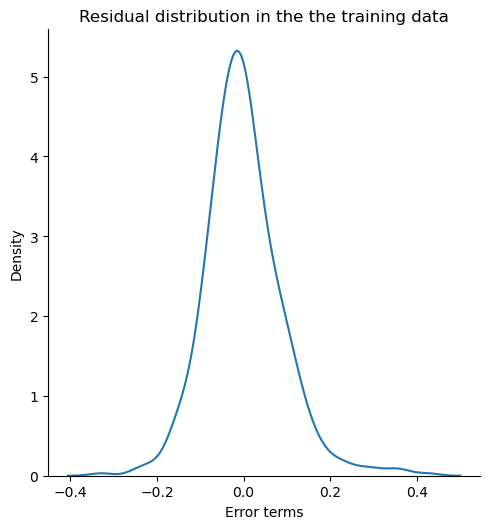

In [33]:
Y_train_pred = LinRegModel_3.predict(X_train_sm) # Getting the predicted target values from the linear model 
                                                 
res_train = Y_train_pred - Y_train # Find the residual by subtracting the target value of the test set from the predicted value

sns.displot(res_train, kind='kde') # plotting a distribtion plot
plt.title('Residual distribution in the the training data')
plt.xlabel('Error terms')
plt.show()

        4.1.4.2. Regression plot between the predicted value and the actual value     

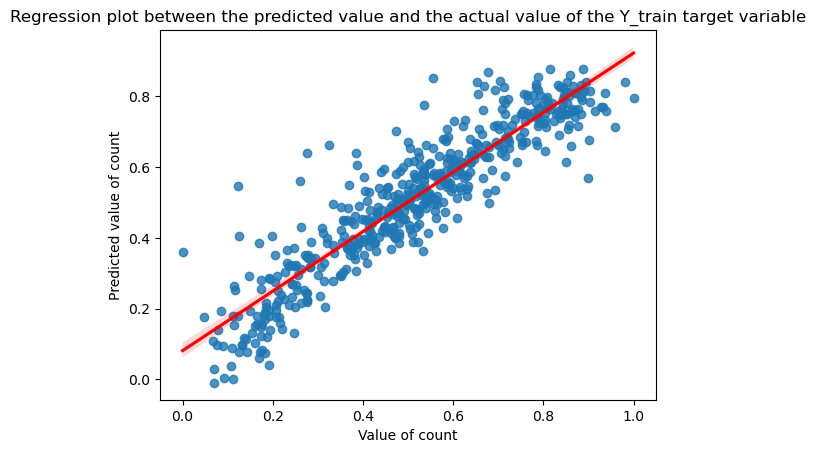

In [34]:
#Plotting a regression plot between the predicted value and the actual value of the Y_train target variable
sns.regplot(x=Y_train,y=Y_train_pred, fit_reg=True, line_kws={"color":'red'})
plt.title('Regression plot between the predicted value and the actual value of the Y_train target variable')
plt.xlabel('Value of count')
plt.ylabel('Predicted value of count')
plt.show()

        4.1.4.3. R-squared calculation for the training set

In [35]:
# Calculating the R-Squared value for the training dataset
rsq_train = r2_score(Y_train,Y_train_pred)
print('The R-squared of the Training data set is : ',round(rsq_train,ndigits=3))

cols = X_train_sm.shape[1] - 1 # Extracting the number of columns of the training dataset. Removed one column to take the constant out
rows = X_train_sm.shape[0] # Extracting the number of rows of the training dataset
# These values will be used in the Adjusted R-Squared calculation 

# Calculating the adjusted R-squared value of the test set using the formula
adj_rsq_train = 1 - (((1 - rsq_train))*(rows - 1)/(rows - cols -1)) # Calculating the Adjusted R Squared using the formula

print('The Adjusted R-squared of the Training data set is : ',round(adj_rsq_train,ndigits=3))

The R-squared of the Training data set is :  0.841
The Adjusted R-squared of the Training data set is :  0.837


        4.1.3.4. Homoscedascity for the training set    

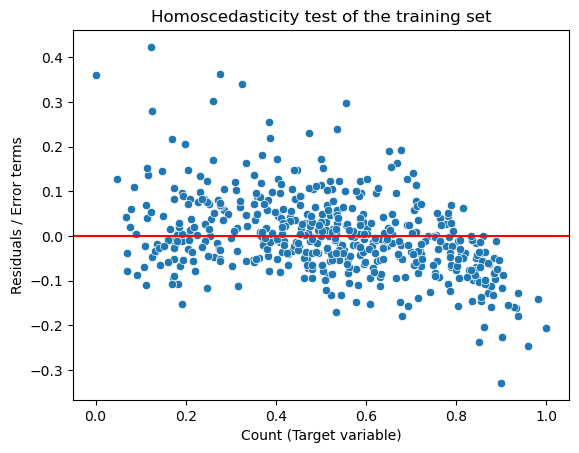

In [36]:
sns.scatterplot(x=Y_train,y = res_train) # Plotting a scatterplot with the Y_value and the residual error 
plt.axhline(y=0, color='red') # Plotting the line at 0 residual error
plt.title('Homoscedasticity test of the training set')
plt.xlabel('Count (Target variable)')
plt.ylabel('Residuals / Error terms')
plt.show()

We do not observe any visible pattern in the error which means that the variance in the error is constant. i.e. the model is homoscedastic.

### 4.2. Working on the test dataset

In [37]:
bikes_test.head() # Check the test dataset

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow / Light Rain,Mist + Cloudy,...,Sept,Mon,Sat,Sun,Thu,Tue,Wed,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,1,0,0,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,1,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,0,0,1,0,0,0,1,0


### 4.2.1. Normalize the test dataset

We should now normalize the test dataset on the fitting done on the training dataset. So we shall only transform as we're using the fit of the training dataset.

In [38]:
bikes_test[num_vars_to_be_normalized] = scaler.transform(bikes_test[num_vars_to_be_normalized]) 
# transforming/normalizing the dataset on the fit on the training dataset

In [39]:
bikes_test.head() # Check the test dataset upon normalization from the train data scaler fit

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow / Light Rain,Mist + Cloudy,...,Sept,Mon,Sat,Sun,Thu,Tue,Wed,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,1,0,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
bikes_test.describe() # Check the numerical values range and statistical figures upon transformation

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow / Light Rain,Mist + Cloudy,...,Sept,Mon,Sat,Sun,Thu,Tue,Wed,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.027273,0.318182,...,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.163248,0.466833,...,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Upon transforming we see that the max values are not exactly 1. <br>
This is due to applying the normalization values of Xmax and Xmin obtained from the training set. <br>
As we all know MinMaxScaler.fit() finds out the Xmax and Xmin values and MinMaxScaler.transform() normalizes the value on these derived values

#### 4.2.2. Remove the columns rejected by RFE in the training set processing.

We should now remove the unwanted columns which were removed by RFE and the ones manually removed by us.

But first we need to split the data into X_test and Y_test

In [41]:
Y_test = bikes_test['cnt'] # Target
X_test = bikes_test.drop(columns=['cnt']) #Predictor features


X_test = X_test[rfe_cols] # Removing the RFE columns
X_test.drop(columns=['hum','holiday'], inplace=True) 
# Removing the hum and holiday value which were removed in the training set due to high VIF and high P-values respectively

X_test.head()

,yr,workingday,temp,windspeed,Light Snow / Light Rain,Mist + Cloudy,Jan,Jul,Sept,Sat,spring,summer,winter
184,0,0,0.831783,0.084219,0,1,0,1,0,0,0,0,0
535,1,1,0.901354,0.153728,0,0,0,0,0,0,0,1,0
299,0,1,0.511964,0.334206,0,1,0,0,0,0,0,0,1
221,0,1,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,0,1,0.817246,0.537414,0,0,0,0,0,0,0,1,0


#### 4.2.3. predict the test set based on the training model

In [42]:
# Getting the constant on the test set
X_test_sm = sm.add_constant(X_test)

In [43]:
Y_test_pred = LinRegModel_3.predict(X_test_sm) # Getting the predicted target values from the linear model 
                                               # obtained from the training dataset

### 4.2.4. Residual analysis on the test set

4.2.4.1. Error distribution plot

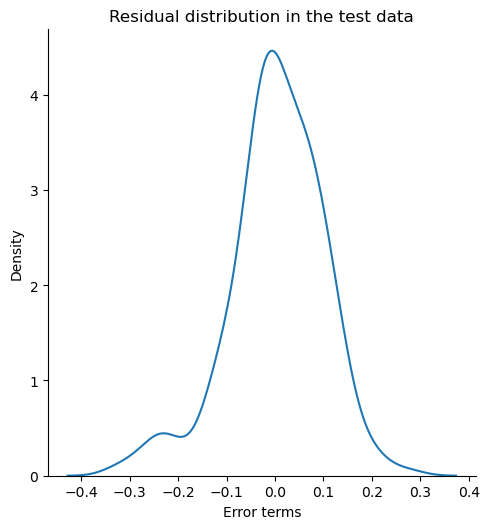

In [44]:
res_test = Y_test - Y_test_pred  # Find the residual by subtracting the target value of the test set from the predicted value

sns.displot(res_test,kind='kde') # Plot the distribution
plt.title('Residual distribution in the test data')
plt.xlabel('Error terms')
plt.show()


We see that the residual plot in the test data set is a normal curve centered along 0. 

4.2.4.2. Regression plot

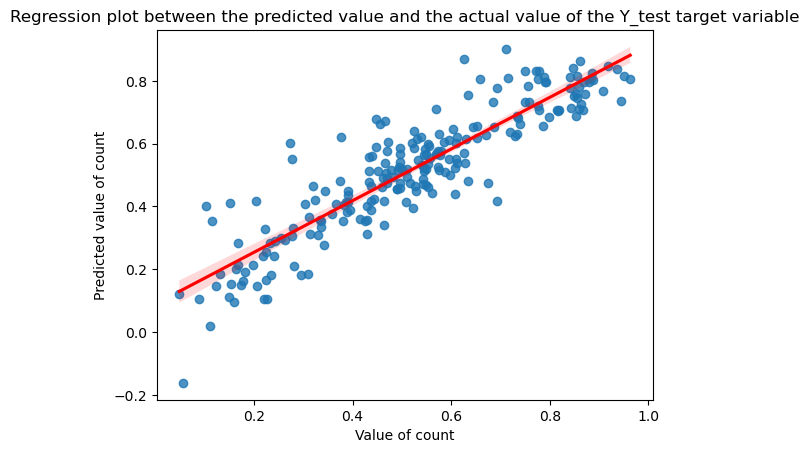

In [45]:
#Plotting a regression plot between the predicted value and the actual value of the Y_test target variable
sns.regplot(x=Y_test,y=Y_test_pred, fit_reg=True, line_kws={"color":'red'})
plt.title('Regression plot between the predicted value and the actual value of the Y_test target variable')
plt.xlabel('Value of count')
plt.ylabel('Predicted value of count')
plt.show()

We see that the regression is showing a straight correlation. We also saw that the error terms are normally distributed.

## 5. Summary and conclusions

### 5.1. Getting the coefficients and the constants

In [46]:
print('Below are the details of the variables influencing the target variable along with the coefficient and constant\n \n')
print(LinRegModel_3.params) # Below are the details of the variables influencing the target variable along with the coefficient and constant

Below are the details of the variables influencing the target variable along with the coefficient and constant
 

const                      0.165727
yr                         0.234642
workingday                 0.054630
temp                       0.472367
windspeed                 -0.157212
Light Snow / Light Rain   -0.289642
Mist + Cloudy             -0.080748
Jan                       -0.039761
Jul                       -0.046815
Sept                       0.073571
Sat                        0.066674
spring                    -0.060719
summer                     0.044839
winter                     0.077511
dtype: float64


### 5.2. Calculating the r-squared and adjusted r-square values for the test dataset

In [47]:
# Calculating the R-Squared value of the test set
rsq_test = r2_score(Y_test,Y_test_pred)


cols = X_test.shape[1] # Extracting the number of columns of the test dataset
rows = X_test.shape[0] # Extracting the number of rows of the test dataset
# These values will be used in the Adjusted R-Squared calculation 

# Calculating the adjusted R-squared value of the test set using the formula
adj_rsq_test = 1 - (((1 - rsq_test))*(rows - 1)/(rows - cols -1)) # Calculating the Adjusted R Squared using the 



Summarize for test and training dataset

In [48]:

print('The R-squared of the Training data set is : ',round(rsq_train,ndigits=3))
print('The R-squared of the Test data set is : ',round(rsq_test,ndigits=3))


print('The Adjusted R-squared of the Training data set is : ',round(adj_rsq_train,ndigits=3))
print('The Adjusted R-squared of the Test data set is : ',round(adj_rsq_test,ndigits=3))

The R-squared of the Training data set is :  0.841
The R-squared of the Test data set is :  0.805
The Adjusted R-squared of the Training data set is :  0.837
The Adjusted R-squared of the Test data set is :  0.793


The R-squared value for both test and training datasets is withing **10 %** of each other. <br>
The R-squared of the Test data set is  **0.805** and the The R-squared of the Training data set is **0.841**. The difference is **4%**.<br>
<br>

For the test and training dataset the difference between the R-squared and R-squared adjusted is within **1 - 5%**. <br><br>
    Training : <br>
    The R-squared of the Training data set is **0.841** and the Adjusted R-squared of the Training data set is **0.837**.<br>
    The difference is **0.4%**<br><br>
    Test : <br>
    The R-squared of the Training data set is **0.805** and the Adjusted R-squared of the Training data set is **0.793**.<br>
    The difference is **1.2%**<br>



### 5.3. Show the regression and error distribution plots

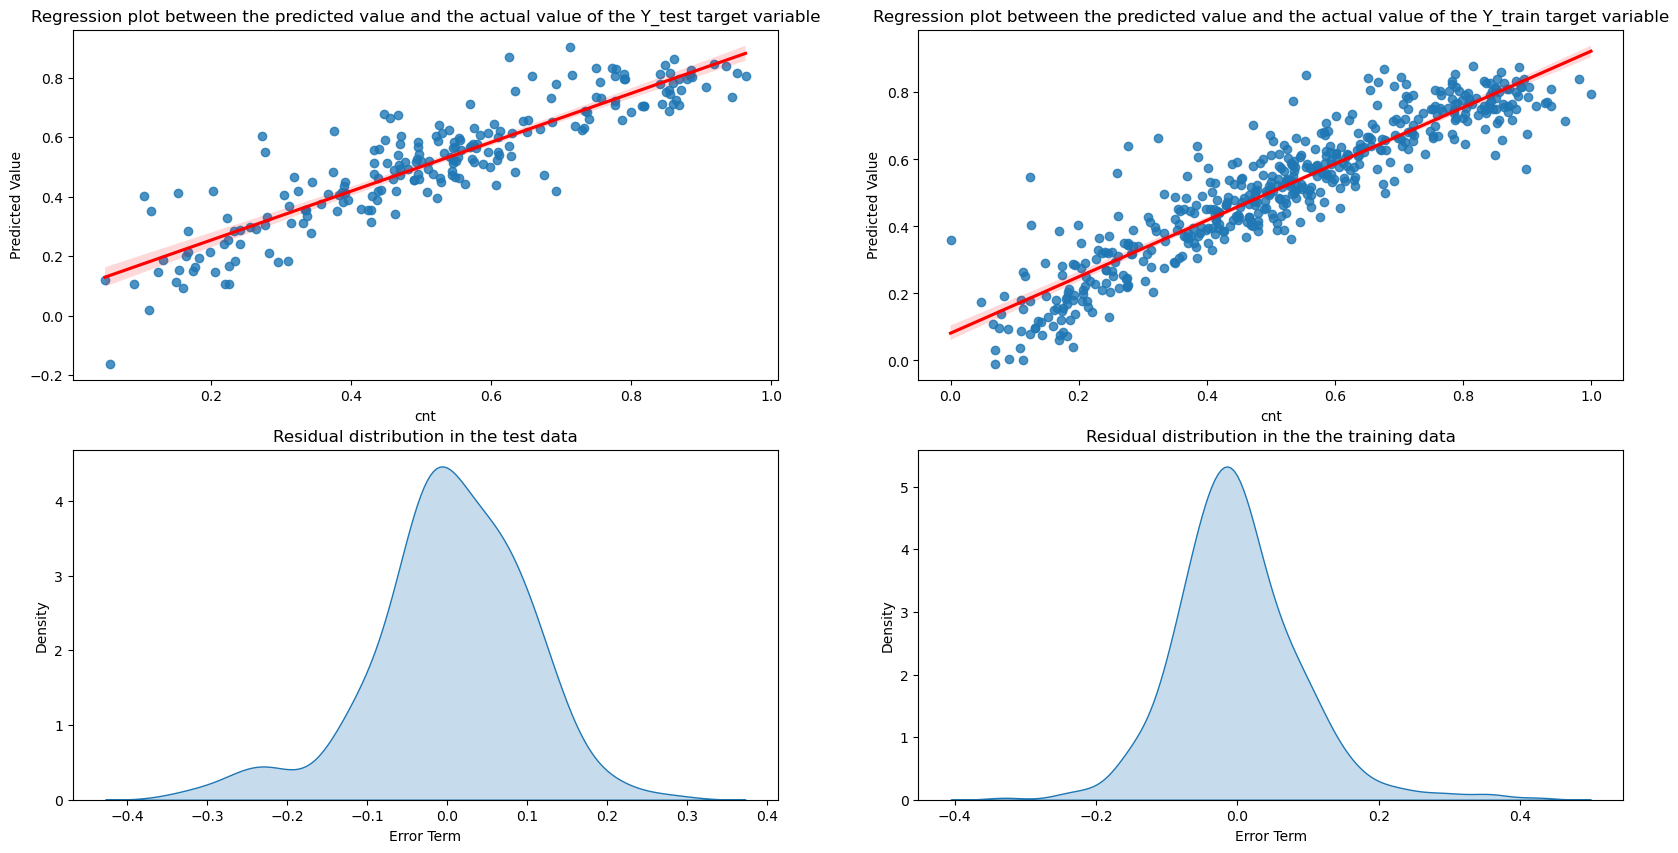

In [49]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
#Plotting a regression plot between the predicted value and the actual value of the Y_test target variable
sns.regplot(x=Y_test,y=Y_test_pred, fit_reg=True, line_kws={"color":'red'})
plt.title('Regression plot between the predicted value and the actual value of the Y_test target variable')
plt.ylabel('Predicted Value')

plt.subplot(2,2,2)
#Plotting a regression plot between the predicted value and the actual value of the Y_train target variable
sns.regplot(x=Y_train,y=Y_train_pred, fit_reg=True, line_kws={"color":'red'})
plt.title('Regression plot between the predicted value and the actual value of the Y_train target variable')
plt.ylabel('Predicted Value')

plt.subplot(2,2,3)
#Plotting a distribution kde plot between the predicted value and the actual value of the Y_test target variable
sns.kdeplot(res_test,fill=True) # Plot the distribution of the test residuals
plt.title('Residual distribution in the test data')
plt.xlabel('Error Term')

plt.subplot(2,2,4)
#Plotting a distribution kde plot between the predicted value and the actual value of the Y_train target variable
sns.kdeplot(res_train,fill=True) # Plot the distribution of the training residuals
plt.title('Residual distribution in the the training data')
plt.xlabel('Error Term')


plt.show()

### 5.4. Conclusions:

The Rsquare and Adjusted Rsquare of the test set are 0.805 and 0.792. Which is a good enough measure.

The demand of bikes depends on factors like<br>

1. Year
2. Working Day
3. Temperature
4. Windspeed
5. Light Rain/Snow
6. Mist
7. January
8. July
9. September
10. Saturday
11. Spring
12. Summer
13. Winter
<br><br>
We can derive the equation : as <br>

The demand for bikes = 0.165 + (2.346 x Year) + (0.054 x Working Day) + (0.472 x Temperature ) - (0.157 x Wind Speed) <br>
                       - (0.289 x Light Rain/Snow) - (0.080 x Mist + Cloud) - (0.039 x January) - (0.046 x July) + (0.073 x September) <br>
                       + (0.066 x Saturday) - (0.060 x Spring) + (0.044 x Summer) + (0.077 x Winter)